## Convolutional Neural Networks
### Importar Librerías

In [30]:
import time
inicio = time.time()
import numpy as np
import os
import re
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

In [31]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.python.keras.models import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from skimage.transform import resize
#from torchvision.transforms import Resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Cargar set de Imágenes

### Separar imagenes para validacion

In [32]:
data_dir = 'imgs60X'
valid_dir = 'val60X'

In [33]:
def select_aleat_image(path):
    
    # Select random file
    #random_folder = random.choice(os.listdir(path))
    random_file = random.choice(
    os.listdir(os.path.join(path)))

    # Create image path
    image_path = os.path.join(path, random_file)
    image_path = os.path.normpath(image_path)

    return image_path

In [34]:
## Crear data temporal
ruta_path = os.getcwd() + os.sep
origen = ruta_path + 'data2'
destino = ruta_path + 'data2_temp'
shutil.copytree(origen, destino)

'/home/jorge/EjemplosPY/WoodTracer/Wood60X/data2_temp'

In [35]:
#dirname = os.path.join(os.getcwd(), 'data2_temp')
imgpath = destino + os.sep
ruta1 = ruta_path + data_dir + os.sep
ruta2 = ruta_path + valid_dir + os.sep
#dirname1 = os.path.join(os.getcwd(), 'val60X')
#imgpath1 = dirname1 + os.sep

print("leyendo imagenes de ",imgpath)

leyendo imagenes de  /home/jorge/EjemplosPY/WoodTracer/Wood60X/data2_temp/


In [36]:
for root, dirnames, filenames in os.walk(imgpath):
    for dirname in dirnames:
        path1 = root + dirname
        folder_nomber = path1.split('/')[7]
        path_dir = ruta2+folder_nomber+os.sep
        os.mkdir(path_dir)
        for i in range(3):
            image_path = select_aleat_image(path1)
            name_image = image_path.split('/')[8]
            new_path = path_dir+dirname+'-'+name_image
            # Mover archivo
            os.rename(image_path, new_path)
            
            # Funcion de Augmantation data
# tomar una imagen aleatoriamente y hacerle cambios, con "augmentation data" y guardar las imagenes
# esto hasta que la cantidad de cada categoria sea igual a 1000

# imagen_increment = 8 # cantidad de imagenes creadas por imagen existente

# # definir y configurar el generador de imagenes
# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     zoom_range=0.2,
#     width_shift_range=0.1,
#     heigth_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True)

### ---------------------------------------------------------------------------------------
            datagen = ImageDataGenerator(
                rotation_range=40,  # Rango de rotación aleatoria en grados
                width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
                height_shift_range=0.2,  # Desplazamiento vertical aleatorio
                shear_range=0.2,  # Distorsión de corte
                zoom_range=0.2,  # Zoom aleatorio
                horizontal_flip=True,  # Volteo horizontal aleatorio
                fill_mode='nearest'  # Modo de relleno
            )

            # Loop a través de todas las imágenes para cada categoría y generar imágenes aumentadas
            for i, images_por_category in enumerate(X):
                images_por_category = np.expand_dims(images_por_category, axis=0)  # Agrega una dimensión al tensor
                for batch in datagen.flow(images_por_category, batch_size=1000, save_to_dir=destino, save_prefix='aug', save_format='jpg'):
                    break  # Solo necesitamos generar 1000 imágenes por categoría
### --------------------------------------------------------------------------------------


origen1 = ruta_path + 'data2_temp'
destino1 = ruta_path + 'imgs60X'
shutil.copytree(origen1, destino1)
shutil.rmtree(origen1, ignore_errors=False)

FileExistsError: [Errno 17] File exists: '/home/jorge/EjemplosPY/WoodTracer/Wood60X/val60X/Ficus_sp/'

In [ ]:
dirname = os.path.join(os.getcwd(), 'imgs60X')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            image_resized = resize(image, (50, 50),anti_aliasing=True,clip=False,preserve_range=True)
            images.append(image_resized)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

## Creamos las etiquetas

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

In [ ]:
maderas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    maderas.append(name[len(name)-1])
    indice=indice+1

In [11]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  29
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


## Creamos Sets de Entrenamiento y Test

In [12]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (2188, 50, 50, 3) (2188,)
Testing data shape :  (547, 50, 50, 3) (547,)


Text(0.5, 1.0, 'Ground Truth : 22')

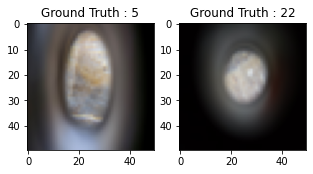

In [13]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

## Preprocesamos las imagenes

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [15]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


## Creamos el Set de Entrenamiento y Validación

In [16]:
# Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1750, 50, 50, 3) (438, 50, 50, 3) (1750, 29) (438, 29)


## Creamos el modelo de CNN

In [18]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 400 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [19]:
# Create the model
wood_model = Sequential()

wood_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(50,50,3)))
wood_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
wood_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
wood_model.add(Dropout(0.25))

wood_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
wood_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
wood_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
wood_model.add(MaxPooling2D(pool_size=(2, 2)))
wood_model.add(Dropout(0.25))

wood_model.add(Flatten())
wood_model.add(Dense(1024, activation='linear'))
wood_model.add(Dropout(0.5))
#wood_model.add(Dense(nClasses, activation='softmax'))
wood_model.add(Dense(nClasses, activation='softmax'))

In [20]:
wood_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       1

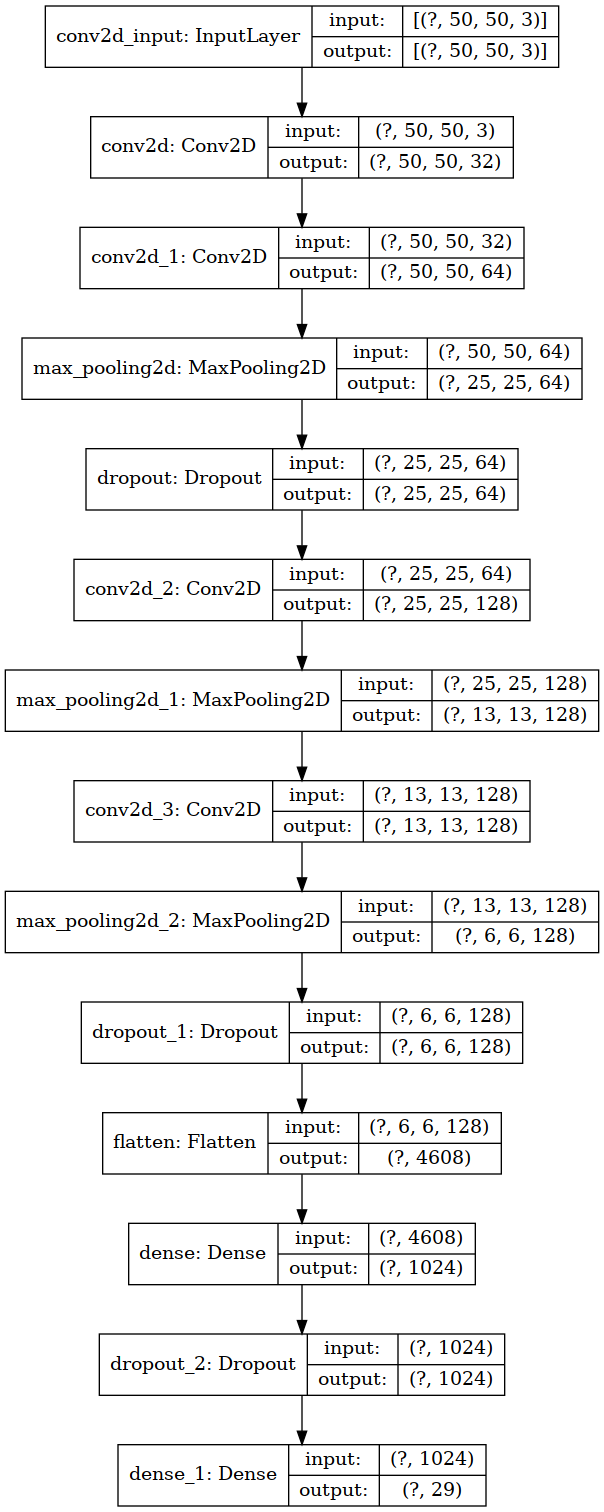

In [21]:
plot_model(wood_model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [22]:
wood_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

## Entrenamos el modelo: Aprende a clasificar imágenes

In [23]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
wood_train = wood_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 1750 samples, validate on 438 samples
Epoch 1/400
1750/1750 [==============================] - 8s 5ms/sample - loss: 3.3792 - accuracy: 0.0457 - val_loss: 3.3132 - val_accuracy: 0.0342
Epoch 2/400
1750/1750 [==============================] - 0s 241us/sample - loss: 3.2969 - accuracy: 0.0663 - val_loss: 3.2542 - val_accuracy: 0.0868
Epoch 3/400
1750/1750 [==============================] - 0s 235us/sample - loss: 3.2402 - accuracy: 0.0863 - val_loss: 3.1890 - val_accuracy: 0.1416
Epoch 4/400
1750/1750 [==============================] - 0s 233us/sample - loss: 3.1988 - accuracy: 0.0869 - val_loss: 3.1267 - val_accuracy: 0.1370
Epoch 5/400
1750/1750 [==============================] - 0s 234us/sample - loss: 3.1127 - accuracy: 0.1251 - val_loss: 3.0289 - val_accuracy: 0.1370
Epoch 6/400
1750/1750 [==============================] - 0s 234us/sample - loss: 3.0229 - accuracy: 0.1571 - val_loss: 2.9190 - val_accuracy: 0.2078
Epoch 7/400
1750/1750 [==============================] - 0s 2

1750/1750 [==============================] - 0s 236us/sample - loss: 0.4203 - accuracy: 0.8966 - val_loss: 0.4357 - val_accuracy: 0.9087
Epoch 110/400
1750/1750 [==============================] - 0s 236us/sample - loss: 0.3941 - accuracy: 0.9063 - val_loss: 0.4249 - val_accuracy: 0.9155
Epoch 111/400
1750/1750 [==============================] - 0s 237us/sample - loss: 0.4294 - accuracy: 0.8823 - val_loss: 0.4398 - val_accuracy: 0.9018
Epoch 112/400
1750/1750 [==============================] - 0s 234us/sample - loss: 0.3902 - accuracy: 0.9063 - val_loss: 0.4303 - val_accuracy: 0.9155
Epoch 113/400
1750/1750 [==============================] - 0s 236us/sample - loss: 0.4156 - accuracy: 0.8829 - val_loss: 0.4404 - val_accuracy: 0.9041
Epoch 114/400
1750/1750 [==============================] - 0s 234us/sample - loss: 0.3906 - accuracy: 0.9046 - val_loss: 0.4279 - val_accuracy: 0.9018
Epoch 115/400
1750/1750 [==============================] - 0s 236us/sample - loss: 0.3774 - accuracy: 0.9063

1750/1750 [==============================] - 0s 245us/sample - loss: 0.2338 - accuracy: 0.9446 - val_loss: 0.3485 - val_accuracy: 0.9338
Epoch 218/400
1750/1750 [==============================] - 0s 246us/sample - loss: 0.2267 - accuracy: 0.9520 - val_loss: 0.3716 - val_accuracy: 0.9269
Epoch 219/400
1750/1750 [==============================] - 0s 250us/sample - loss: 0.2389 - accuracy: 0.9486 - val_loss: 0.3741 - val_accuracy: 0.9269
Epoch 220/400
1750/1750 [==============================] - 0s 241us/sample - loss: 0.2334 - accuracy: 0.9469 - val_loss: 0.3669 - val_accuracy: 0.9292
Epoch 221/400
1750/1750 [==============================] - 0s 245us/sample - loss: 0.2336 - accuracy: 0.9463 - val_loss: 0.3906 - val_accuracy: 0.9224
Epoch 222/400
1750/1750 [==============================] - 0s 235us/sample - loss: 0.2443 - accuracy: 0.9411 - val_loss: 0.3694 - val_accuracy: 0.9292
Epoch 223/400
1750/1750 [==============================] - 0s 235us/sample - loss: 0.2331 - accuracy: 0.9497

1750/1750 [==============================] - 0s 237us/sample - loss: 0.2041 - accuracy: 0.9509 - val_loss: 0.3629 - val_accuracy: 0.9292
Epoch 326/400
1750/1750 [==============================] - 0s 241us/sample - loss: 0.1845 - accuracy: 0.9594 - val_loss: 0.3191 - val_accuracy: 0.9429
Epoch 327/400
1750/1750 [==============================] - 0s 240us/sample - loss: 0.1920 - accuracy: 0.9577 - val_loss: 0.3058 - val_accuracy: 0.9521
Epoch 328/400
1750/1750 [==============================] - 0s 237us/sample - loss: 0.1792 - accuracy: 0.9554 - val_loss: 0.3185 - val_accuracy: 0.9406
Epoch 329/400
1750/1750 [==============================] - 0s 238us/sample - loss: 0.1827 - accuracy: 0.9611 - val_loss: 0.3257 - val_accuracy: 0.9384
Epoch 330/400
1750/1750 [==============================] - 0s 237us/sample - loss: 0.1875 - accuracy: 0.9634 - val_loss: 0.3140 - val_accuracy: 0.9452
Epoch 331/400
1750/1750 [==============================] - 0s 236us/sample - loss: 0.1704 - accuracy: 0.9617

In [24]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
wood_model.save("Wood2GPU3_mnist.h5")

## Evaluamos la red

In [25]:
test_eval = wood_model.evaluate(test_X, test_Y_one_hot, verbose=1)

547/547 [==============================] - 0s 295us/sample - loss: 0.2452 - accuracy: 0.9580


In [26]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.24523425636850502
Test accuracy: 0.95795244


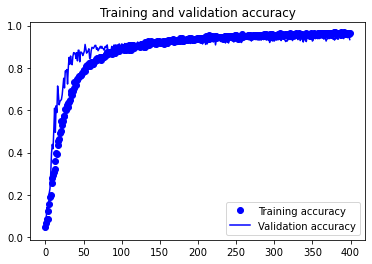

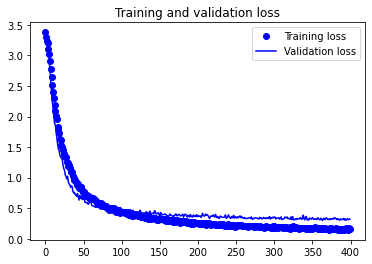

In [27]:
accuracy = wood_train.history['accuracy']
val_accuracy = wood_train.history['val_accuracy']
loss = wood_train.history['loss']
val_loss = wood_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
predicted_classes2 = wood_model.predict(test_X)

In [29]:
predicted_classes=[]
for predicted_wood in predicted_classes2:
    predicted_classes.append(predicted_wood.tolist().index(max(predicted_wood)))
predicted_classes=np.array(predicted_classes)

In [30]:
predicted_classes.shape, test_Y.shape

((547,), (547,))

## Aprendamos de los errores: Qué mejorar

Found 524 correct labels


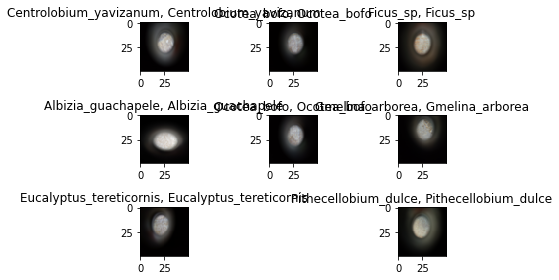

In [31]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(maderas[predicted_classes[correct]],
                                                    maderas[test_Y[correct]]))

    plt.tight_layout()

Found 23 incorrect labels


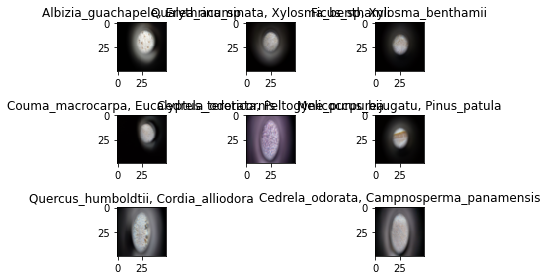

In [32]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(maderas[predicted_classes[incorrect]],
                                                    maderas[test_Y[incorrect]]))
    plt.tight_layout()

In [33]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96        24
     Class 1       1.00      1.00      1.00        23
     Class 2       0.82      1.00      0.90        18
     Class 3       1.00      0.84      0.91        19
     Class 4       1.00      1.00      1.00        23
     Class 5       1.00      0.90      0.95        10
     Class 6       1.00      1.00      1.00        25
     Class 7       0.00      0.00      0.00         1
     Class 8       1.00      1.00      1.00        10
     Class 9       1.00      1.00      1.00        11
    Class 10       1.00      1.00      1.00         5
    Class 11       0.82      1.00      0.90        18
    Class 12       0.73      1.00      0.85        11
    Class 13       0.89      0.67      0.76        12
    Class 14       0.96      1.00      0.98        23
    Class 15       0.97      0.97      0.97        37
    Class 16       0.96      1.00      0.98        26
    Class 17       1.00    

/home/jorge/anaconda3/envs/ML36-GPU/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jorge/anaconda3/envs/ML36-GPU/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jorge/anaconda3/envs/ML36-GPU/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Prediccion de una nueva imagen¶

In [36]:
dirname = os.path.join(os.getcwd(), 'val60X')
imgpath = dirname + os.sep 

images2 = []
filenames1 = []
cont = 0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            image_resized = resize(image, (50, 50),anti_aliasing=True,clip=False,preserve_range=True)
            images.append(image_resized)
        filenames1.append(filename)         
    X = np.array(images2, dtype=np.uint8) #convierto de lista a numpy
    test_X = X.astype('float32')
    test_X = test_X / 255.

predicted_classes = wood_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    cadena = filenames1[i]
    if (cadena.count(maderas[img_tagged.tolist().index(max(img_tagged))])):
        cont = cont + 1
    print(filenames1[i],' -> ',maderas[img_tagged.tolist().index(max(img_tagged))])
    
print("______________________________________________________________")
    
print("Probabilidad de Deteccion: {:.2f}%".format((cont/(i+1)*100)))
    

leyendo imagenes de  /home/jorge/EjemplosPY/WoodTracer/Wood60X/val60X/


ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (0, 1)

In [ ]:
fin = time.time()
print(fin-inicio) 


In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [37]:
!mkdir carpeta_salida-31082023

In [38]:
!tensorflowjs_converter --input_format keras Wood2GPU3_mnist-31082023.h5 carpeta_salida-31082023